## High risk states in India to defend COVID 19

## Dataset

#### Indian Population Dataset based on 2011 Census 
Main Source [Wikipedia](https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population)<br/>
Alternate CSV Source [Kaggle](https://www.kaggle.com/sudalairajkumar/covid19-in-india/?select=population_india_census2011.csv)

#### Hospital Bed Dataset 
Main Source [Ministry of Health and Family Welfare](https://pib.gov.in/PressReleasePage.aspx?PRID=1539877)
<br/>
Alternate CSV Source [Kaggle](https://www.kaggle.com/sudalairajkumar/covid19-in-india/?select=HospitalBedsIndia.csv)

#### Covid 19 State-wise data  
Main Source [api.covid19india.org](https://api.covid19india.org/csv/latest/state_wise.csv)



High risk states will be those with lower number of infrastructures(Isolation wards) and high population. We now calculate the ratio of number of beds to population and find the high risk states in India.
**A scatter plot will be plotted and we will show high risk states in red and least risk states in white-yellow shade.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Analysis on older dataset 

Dataset which was released about 2 months before

### Importing dataset for analysis

In [6]:
# Population Dataset
populationData = pd.read_csv("population_india_census2011.csv")
# Hospital Bed Dataset
hospitalData = pd.read_csv("HospitalBedsIndia.csv")
# Covid 19 cases
covidData = pd.read_csv("state_wise.csv")

**Population Dataset**

In [7]:
populationData.columns = ["Sno", "State", "Population", "Rural", "Urban", "Area", "Density", "Gender"]
censusData = populationData[["State", "Population", "Rural", "Urban"]]
censusData.head()

,State,Population,Rural,Urban
0,Uttar Pradesh,199812341,155317278,44495063
1,Maharashtra,112374333,61556074,50818259
2,Bihar,104099452,92341436,11758016
3,West Bengal,91276115,62183113,29093002
4,Madhya Pradesh,72626809,52557404,20069405


**Hospital Infrastructures** - Number of beds available

In [8]:
hospitalData.columns = ['Sno', 'State', 'NumPrimaryHealthCenters',
       'NumCommunityHealthCenters', 'NumSubDistrictHospitals',
       'NumDistrictHospitals', 'TotalPublicHealthFacilities',
       'NumPublicBeds', 'NumRuralHospitals', 'NumRuralBeds',
       'NumUrbanHospitals', 'NumUrbanBeds']
bedsData = hospitalData[["State", "NumPublicBeds", "NumRuralBeds", "NumUrbanBeds"]]
bedsData.head()

,State,NumPublicBeds,NumRuralBeds,NumUrbanBeds
0,Andaman & Nicobar Islands,1246,575,500
1,Andhra Pradesh,60799,6480,16658
2,Arunachal Pradesh,2320,2136,268
3,Assam,19115,10944,6198
4,Bihar,17796,6083,5936


**Covid 19 Data**

In [9]:
covidData = covidData[["State", "Confirmed", "Recovered", "Deaths", "Active"]]
covidData.head()

,State,Confirmed,Recovered,Deaths,Active
0,Total,88506,33133,2790,52578
1,Maharashtra,29100,6564,1068,21468
2,Tamil Nadu,10585,3538,74,6973
3,Gujarat,10989,4308,625,6056
4,Delhi,9333,3926,129,5278


**Merging Data**

In [10]:
# Merging Data
census_covid = pd.merge(censusData, covidData, how="inner", on="State") 
beds_census_covid = pd.merge(census_covid, bedsData, how="inner", on="State")
data = beds_census_covid
data.head()

,State,Population,Rural,Urban,Confirmed,Recovered,Deaths,Active,NumPublicBeds,NumRuralBeds,NumUrbanBeds
0,Uttar Pradesh,199812341,155317278,44495063,4057,2165,95,1797,58310,39104,37156
1,Maharashtra,112374333,61556074,50818259,29100,6564,1068,21468,68998,12398,39048
2,Bihar,104099452,92341436,11758016,1145,440,7,698,17796,6083,5936
3,West Bengal,91276115,62183113,29093002,2576,892,232,1452,51163,19684,58882
4,Madhya Pradesh,72626809,52557404,20069405,4595,2283,239,2073,38140,10020,18819


**Calculating ratio between Number of beds to Population**

In [11]:
# # For Calculation based on Urban / Rural Data. Here In this case we don't do for now
# data["RuralBeds_Pop_ratio"] = data["NumRuralBeds"] / data["Rural"]
# data["UrbanBeds_Pop_ratio"] = data["NumUrbanBeds"] / data["Urban"]
# State wise data
data["TotalBeds"] = data["NumPublicBeds"] + data["NumRuralBeds"] + data["NumUrbanBeds"]
data["TotalBeds_Pop_Ratio"] = data["TotalBeds"] / data["Population"]
data["RemainingBeds"] = data["TotalBeds"] - data["Active"]
# For Scatter Plot
data["RemainingBeds_Pop_Ratio"] = data["RemainingBeds"] / data["Population"]

# For better scale in scatter plot
data["Population"] = data["Population"]/1000000 # In Million
data["RemainingBeds"] = data["RemainingBeds"] / 1000 # In 1000

data.head()

,State,Population,Rural,Urban,Confirmed,Recovered,Deaths,Active,NumPublicBeds,NumRuralBeds,NumUrbanBeds,TotalBeds,TotalBeds_Pop_Ratio,RemainingBeds,RemainingBeds_Pop_Ratio
0,Uttar Pradesh,199.812341,155317278,44495063,4057,2165,95,1797,58310,39104,37156,134570,0.000673,132.773,0.000664
1,Maharashtra,112.374333,61556074,50818259,29100,6564,1068,21468,68998,12398,39048,120444,0.001072,98.976,0.000881
2,Bihar,104.099452,92341436,11758016,1145,440,7,698,17796,6083,5936,29815,0.000286,29.117,0.000280
3,West Bengal,91.276115,62183113,29093002,2576,892,232,1452,51163,19684,58882,129729,0.001421,128.277,0.001405
4,Madhya Pradesh,72.626809,52557404,20069405,4595,2283,239,2073,38140,10020,18819,66979,0.000922,64.906,0.000894


In [12]:
%matplotlib notebook

## Plotting Scatter Plot

### Interactivity is included. Click on plots to know details of a state

<IPython.core.display.Javascript object>


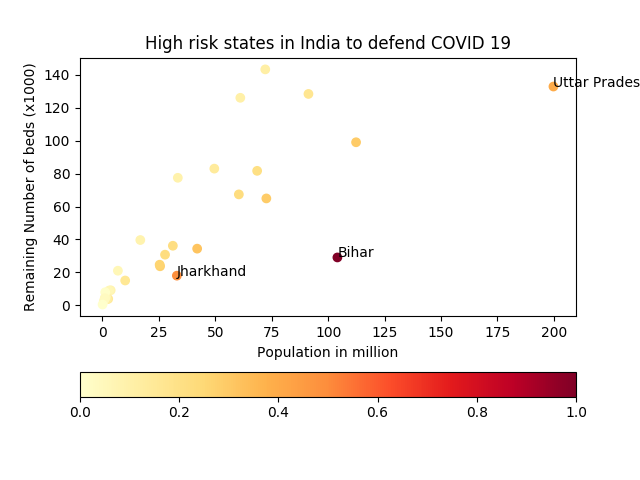

In [15]:
import matplotlib.colors as col
import matplotlib.cm as cm

# plt.figure(figsize=(8, 7))
# Color Map
colorMap = "YlOrRd"
# Threashold where we consider if less than threshold its high risk
threshold = 0.0008

# Scatter Plot with color shade as the ratio of decreasing amount of beds
fig, ax = plt.subplots()
ax.scatter(data["Population"], data["RemainingBeds"], c=1/data["RemainingBeds_Pop_Ratio"], cmap=colorMap, picker=5)

# Setting OFF Grid
plt.grid(False)

# Setting the Axes and background color
# ax = plt.gca()
# ax.set_ylim([0, 0.01])
ax.set_facecolor('white')

n = data["State"].values
for i, txt in enumerate(n):
    if  data["RemainingBeds_Pop_Ratio"][i] < threshold:
        ax.annotate(txt, (data["Population"][i], data["RemainingBeds"][i]))


# Setting XLabel and YLabel
plt.xlabel("Population in million")
plt.ylabel("Remaining Number of beds (x1000)")
plt.title("High risk states in India to defend COVID 19")

# Initializing the text box
text = plt.text(150, 30, "")

# Interactive Pick Event Listner Function
def interactive(event):
#     plt.title(data.iloc[event.ind[0]]["State"])
    # Setting the data inside text box
    text.set_text("State: {}\nRemaining Beds(x1000): {}\nPopulation(million): {}".format(data.iloc[event.ind[0]]["State"], data.iloc[event.ind[0]]["TotalBeds"], data.iloc[event.ind[0]]["Population"]))

    
# Horizontal colormap for the data
cpick = cm.ScalarMappable(cmap=colorMap, norm=col.Normalize(vmin=0, vmax=1.0))
cpick.set_array([])
cbar = plt.colorbar(cpick, orientation="horizontal")

# Binding Event Listner to the figure
plt.gcf().canvas.mpl_connect('pick_event', interactive);

# Show
plt.show()

**State which needs more care**

In [16]:
morecare = data[data.RemainingBeds_Pop_Ratio == data.RemainingBeds_Pop_Ratio.min()]
print("{}, is where more care has to be taken. \nState has active cases and have {} beds available in total for {} million people.".format(morecare["State"].values[0], morecare["TotalBeds"].values[0], morecare["Population"].values[0]))

Bihar, is where more care has to be taken. 
State has active cases and have 29815 beds available in total for 104.099452 million people.


## Analysis on relatively newer dataset

_Assumption are taken based on the availability of dataset_

Dataset released recently

In [17]:
# Covid 19 cases
covidData = pd.read_csv("state_wise_newer.csv")

In [18]:
# Merging Data
census_covid = pd.merge(censusData, covidData, how="inner", on="State") 
beds_census_covid = pd.merge(census_covid, bedsData, how="inner", on="State")
data = beds_census_covid
data.head()

,State,Population,Rural,Urban,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,NumPublicBeds,NumRuralBeds,NumUrbanBeds
0,Uttar Pradesh,199812341,155317278,44495063,509903,479182,7354,23367,14/11/2020 23:53:22,0,UP,0,0,0,NaN,58310,39104,37156
1,Maharashtra,112374333,61556074,50818259,1744698,1612314,45914,85503,14/11/2020 21:47:25,967,MH,0,0,0,[Sep 9] :239 cases have been removed from the ...,68998,12398,39048
2,Bihar,104099452,92341436,11758016,226916,219864,1184,5867,15/11/2020 18:54:26,1,BR,247,614,5,NaN,17796,6083,5936
3,West Bengal,91276115,62183113,29093002,428498,390096,7610,30792,14/11/2020 21:15:25,0,WB,0,0,0,NaN,51163,19684,58882
4,Madhya Pradesh,72626809,52557404,20069405,183057,170969,3083,9005,14/11/2020 23:53:24,0,MP,0,0,0,[Oct 14]: 4469 confirmed cases and 4469 recove...,38140,10020,18819


In [19]:
# # For Calculation based on Urban / Rural Data. Here In this case we don't do for now
# data["RuralBeds_Pop_ratio"] = data["NumRuralBeds"] / data["Rural"]
# data["UrbanBeds_Pop_ratio"] = data["NumUrbanBeds"] / data["Urban"]
# State wise data
data["TotalBeds"] = data["NumPublicBeds"] + data["NumRuralBeds"] + data["NumUrbanBeds"]
data["TotalBeds_Pop_Ratio"] = data["TotalBeds"] / data["Population"]
data["RemainingBeds"] = data["TotalBeds"] - data["Active"]
# For Scatter Plot
data["RemainingBeds_Pop_Ratio"] = data["RemainingBeds"] / data["Population"]

# For better scale in scatter plot
data["Population"] = data["Population"]/1000000 # In Million
data["RemainingBeds"] = data["RemainingBeds"] / 1000 # In 1000

data.head()

,State,Population,Rural,Urban,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,...,Delta_Recovered,Delta_Deaths,State_Notes,NumPublicBeds,NumRuralBeds,NumUrbanBeds,TotalBeds,TotalBeds_Pop_Ratio,RemainingBeds,RemainingBeds_Pop_Ratio
0,Uttar Pradesh,199.812341,155317278,44495063,509903,479182,7354,23367,14/11/2020 23:53:22,0,...,0,0,NaN,58310,39104,37156,134570,0.000673,111.203,0.000557
1,Maharashtra,112.374333,61556074,50818259,1744698,1612314,45914,85503,14/11/2020 21:47:25,967,...,0,0,[Sep 9] :239 cases have been removed from the ...,68998,12398,39048,120444,0.001072,34.941,0.000311
2,Bihar,104.099452,92341436,11758016,226916,219864,1184,5867,15/11/2020 18:54:26,1,...,614,5,NaN,17796,6083,5936,29815,0.000286,23.948,0.000230
3,West Bengal,91.276115,62183113,29093002,428498,390096,7610,30792,14/11/2020 21:15:25,0,...,0,0,NaN,51163,19684,58882,129729,0.001421,98.937,0.001084
4,Madhya Pradesh,72.626809,52557404,20069405,183057,170969,3083,9005,14/11/2020 23:53:24,0,...,0,0,[Oct 14]: 4469 confirmed cases and 4469 recove...,38140,10020,18819,66979,0.000922,57.974,0.000798


<IPython.core.display.Javascript object>


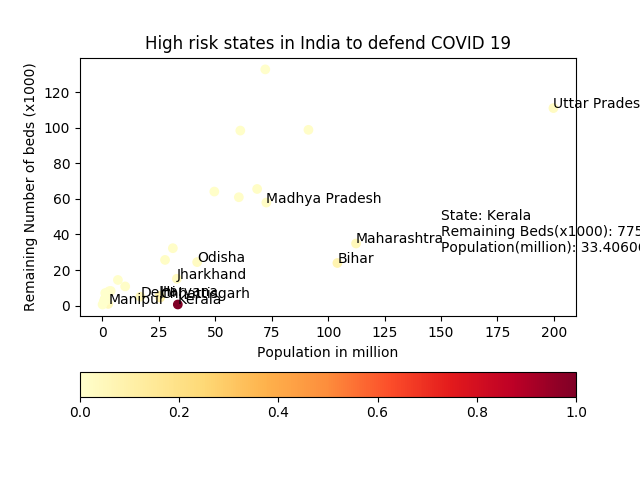

In [20]:
import matplotlib.colors as col
import matplotlib.cm as cm

# plt.figure(figsize=(8, 7))
# Color Map
colorMap = "YlOrRd"
# Threashold where we consider if less than threshold its high risk
threshold = 0.0008

# Scatter Plot with color shade as the ratio of decreasing amount of beds
fig, ax = plt.subplots()
ax.scatter(data["Population"], data["RemainingBeds"], c=1/data["RemainingBeds_Pop_Ratio"], cmap=colorMap, picker=5)

# Setting OFF Grid
plt.grid(False)

# Setting the Axes and background color
# ax = plt.gca()
# ax.set_ylim([0, 0.01])
ax.set_facecolor('white')

n = data["State"].values
for i, txt in enumerate(n):
    if  data["RemainingBeds_Pop_Ratio"][i] < threshold:
        ax.annotate(txt, (data["Population"][i], data["RemainingBeds"][i]))


# Setting XLabel and YLabel
plt.xlabel("Population in million")
plt.ylabel("Remaining Number of beds (x1000)")
plt.title("High risk states in India to defend COVID 19")

# Initializing the text box
text = plt.text(150, 30, "")

# Interactive Pick Event Listner Function
def interactive(event):
#     plt.title(data.iloc[event.ind[0]]["State"])
    # Setting the data inside text box
    text.set_text("State: {}\nRemaining Beds(x1000): {}\nPopulation(million): {}".format(data.iloc[event.ind[0]]["State"], data.iloc[event.ind[0]]["TotalBeds"], data.iloc[event.ind[0]]["Population"]))

    
# Horizontal colormap for the data
cpick = cm.ScalarMappable(cmap=colorMap, norm=col.Normalize(vmin=0, vmax=1.0))
cpick.set_array([])
cbar = plt.colorbar(cpick, orientation="horizontal")

# Binding Event Listner to the figure
plt.gcf().canvas.mpl_connect('pick_event', interactive);

# Show
plt.show()

In [21]:
morecare = data[data.RemainingBeds_Pop_Ratio == data.RemainingBeds_Pop_Ratio.min()]
print("{}, is where more care has to be taken. \nState has active cases and have {} beds available in total for {} million people.".format(morecare["State"].values[0], morecare["TotalBeds"].values[0], morecare["Population"].values[0]))

Kerala, is where more care has to be taken. 
State has active cases and have 77515 beds available in total for 33.406061 million people.


# Conclusion

This analytics shows how severe is current condition and how drastically conditions change. Also analysis shows how critical is the days to come. Stay Home. Stay Safe. 